In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size':15})

## Choosing a function to fit

In [2]:
lmc_df = pd.read_csv('data/LMC_Cepheids.csv')

In [3]:
lmc_df.head()

,star_ID,period,mag_1,err_mag_1,mag_2,err_mag_2,colour,err_colour
0,HV00872,29.820,11.320,0.005,11.381,0.005,-0.061,0.002
1,HV00873,34.426,10.872,0.006,10.903,0.006,-0.029,0.002
2,HV00875,30.338,11.094,0.003,11.077,0.003,0.016,0.001
3,HV00876,22.716,11.558,0.006,11.592,0.007,-0.033,0.002
4,HV00877,45.155,10.701,0.004,10.790,0.004,-0.089,0.002


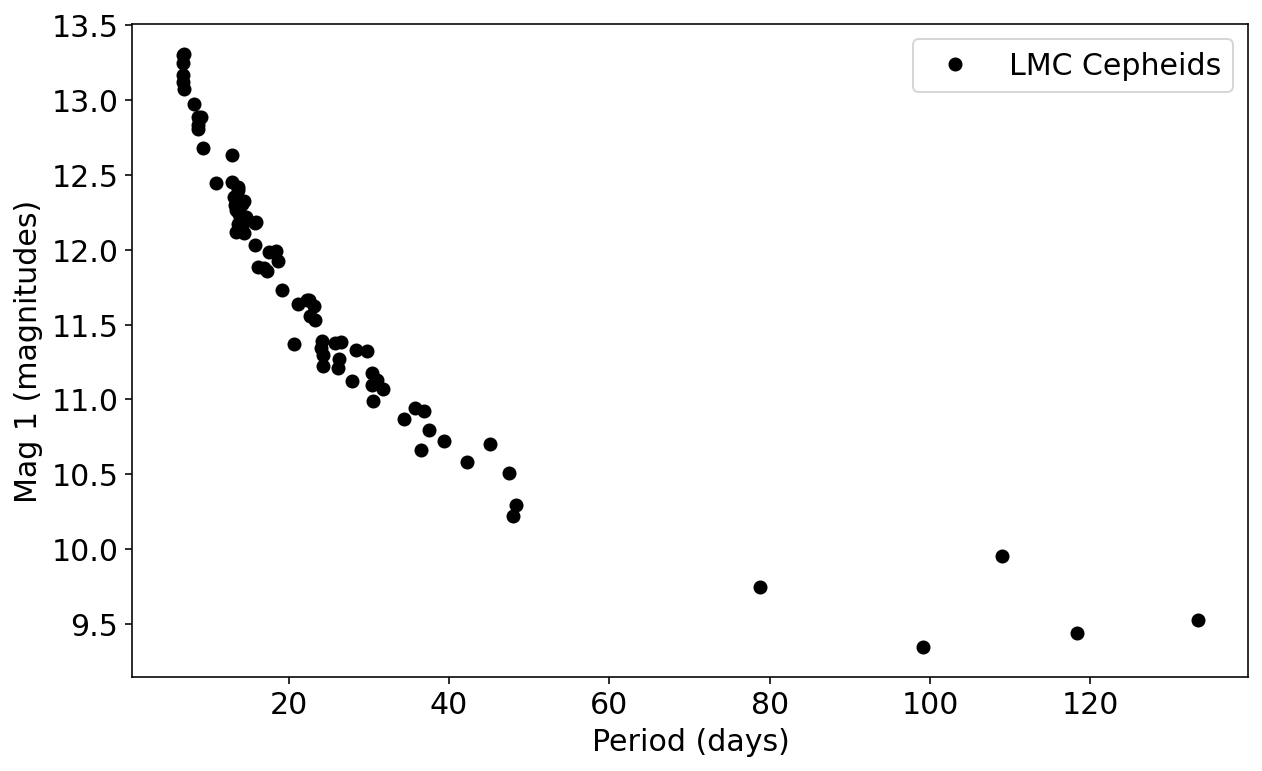

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(lmc_df['period'], lmc_df['mag_1'], color='k', marker='o', linestyle='None', label='LMC Cepheids')
ax.set_xlabel('Period (days)')
ax.set_ylabel('Mag 1 (magnitudes)')
ax.legend()
#plt.savefig('./images/lmc_plot_1.png', dpi=300)

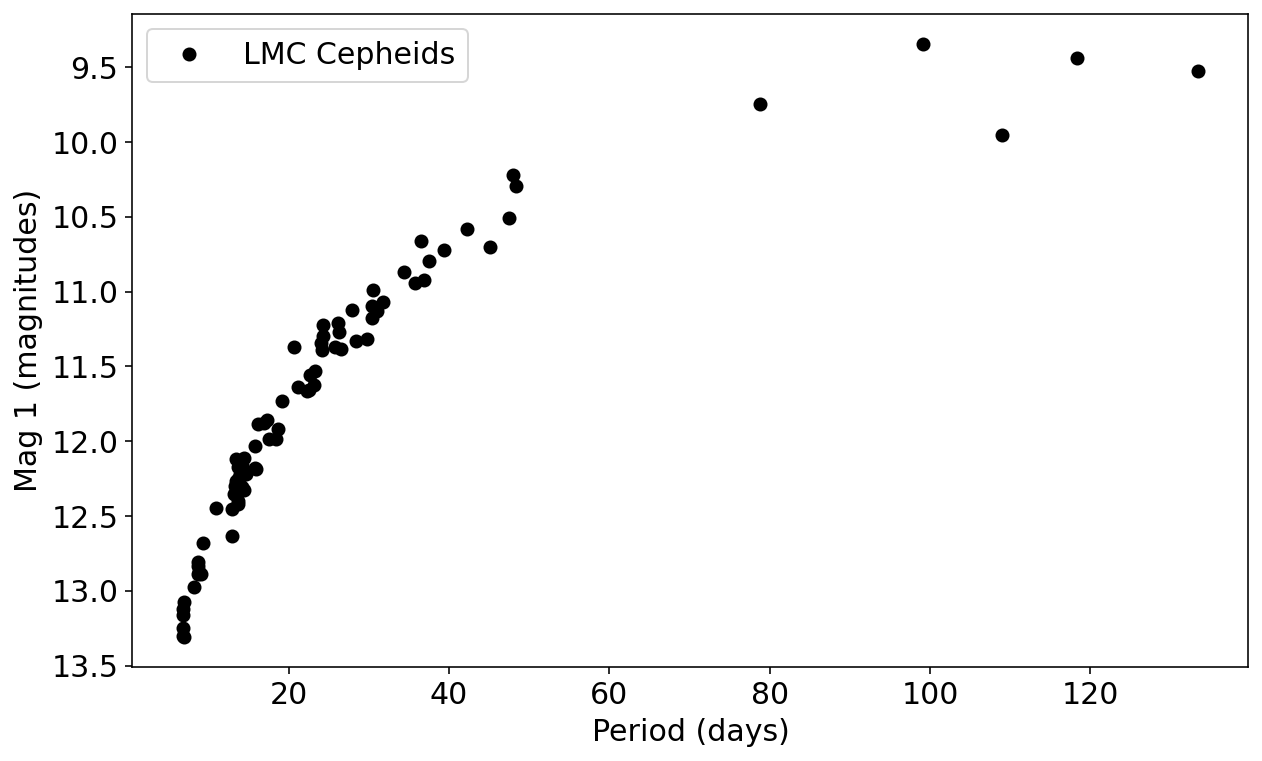

In [5]:
ax.invert_yaxis()
fig

In [6]:
def log_p_mag(p, a, b):
    mag = a * np.log10(p) + b
    return(mag)

In [7]:
popt, pcov = curve_fit(log_p_mag, lmc_df['period'], lmc_df['mag_1'])

a = popt[0]
b = popt[1]

err_a = np.sqrt(pcov[0][0])
err_b = np.sqrt(pcov[1][1])

print("a = {0:.3f} +/- {1:.3f}".format(a, err_a))
print("b = {0:.3f} +/- {1:.3f}".format(b, err_b))

a = -3.145 +/- 0.052
b = 15.817 +/- 0.069


In [8]:
popt2, pcov2 = curve_fit(log_p_mag, lmc_df['period'], lmc_df['mag_2'])

a2 = popt2[0]
b2 = popt2[1]

err_a2 = np.sqrt(pcov2[0][0])
err_b2 = np.sqrt(pcov2[1][1])

print("a2 = {0:.3f} +/- {1:.3f}".format(a2, err_a2))
print("b2 = {0:.3f} +/- {1:.3f}".format(b2, err_b2))

a2 = -3.089 +/- 0.051
b2 = 15.761 +/- 0.068


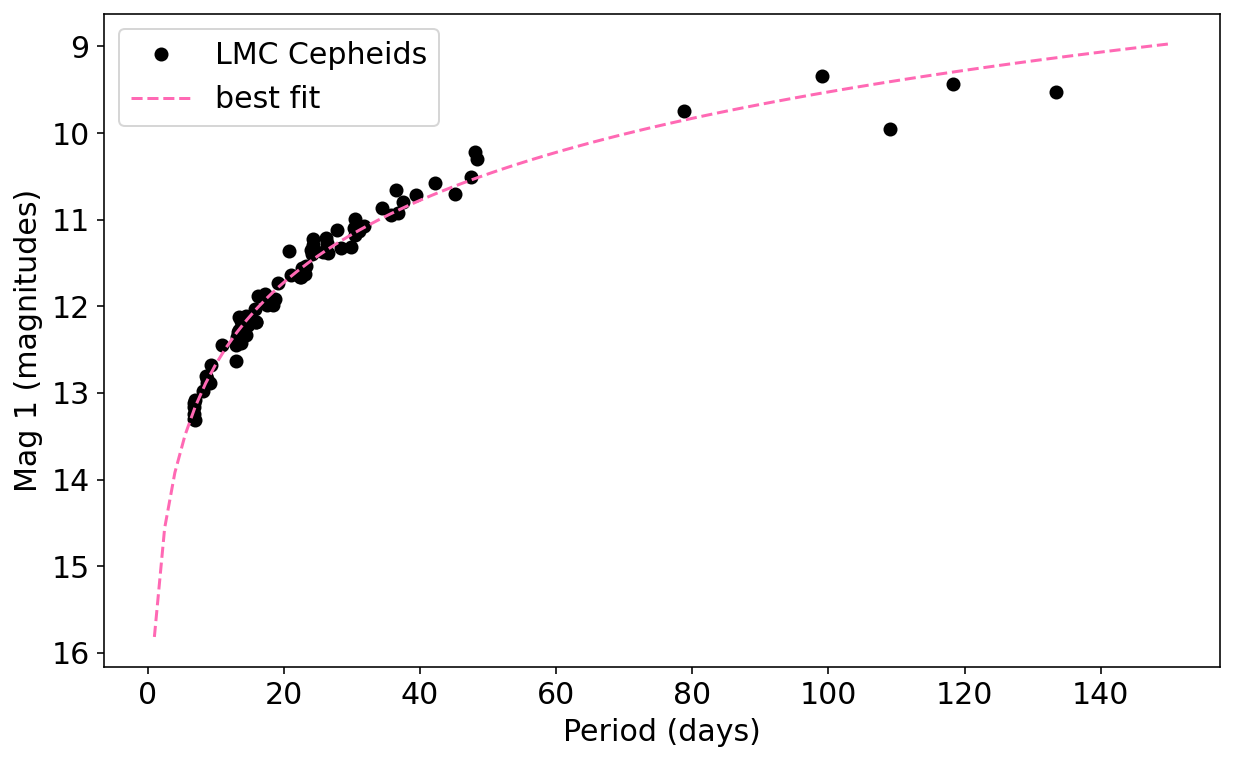

In [9]:
fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot(1,1,1)

ax2.plot(lmc_df['period'], lmc_df['mag_1'], color='k', marker='o', linestyle='None', label='LMC Cepheids')

p = np.linspace(1, 150, 100)

ax2.plot(p, log_p_mag(p, a, b), color='hotpink', ls='--', label='best fit')

ax2.set_xlabel('Period (days)')
ax2.set_ylabel('Mag 1 (magnitudes)')
ax2.legend()
ax2.invert_yaxis()
plt.show()

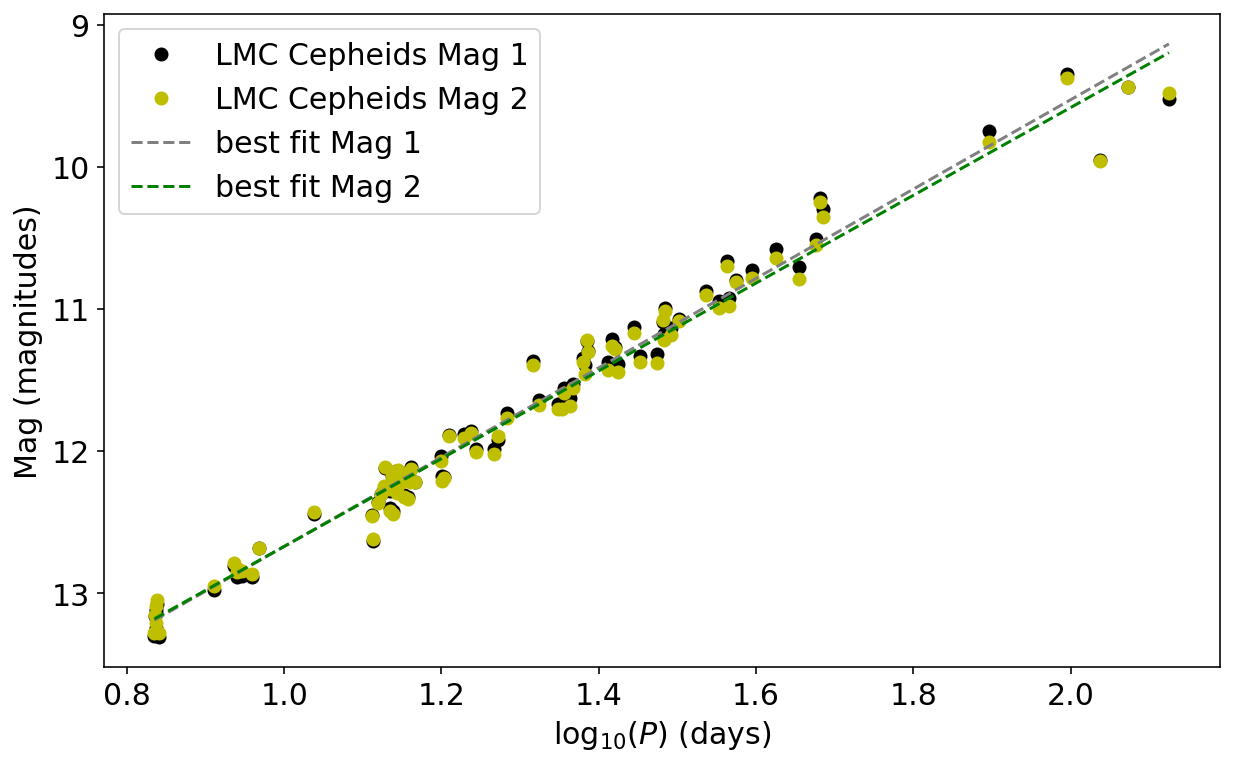

In [10]:
fig3 = plt.figure(figsize=(10,6))
ax3 = fig3.add_subplot(1,1,1)

ax3.plot(np.log10(lmc_df['period']), lmc_df['mag_1'], color='k', marker='o', linestyle='None', label='LMC Cepheids Mag 1')
ax3.plot(np.log10(lmc_df['period']), lmc_df['mag_2'], color='y', marker='o', linestyle='None', label='LMC Cepheids Mag 2')

p = np.linspace(lmc_df['period'].min(), lmc_df['period'].max(), 100)

ax3.plot(np.log10(p), log_p_mag(p, a, b), color='grey', ls='--', label='best fit Mag 1')
ax3.plot(np.log10(p), log_p_mag(p, a2, b2), color='green', ls='--', label='best fit Mag 2')

ax3.set_xlabel('$\log_{10}(P)$ (days)')
ax3.set_ylabel('Mag (magnitudes)')
ax3.legend()
ax3.invert_yaxis()
plt.show()

## Uncertainties

In [11]:
lmc2_df = pd.read_csv('data/HV00872_phot.csv')
lmc2_df.head()

,phase,mag_1,err_mag_1,mag_2,err_mag_2
0,0.919,11.568,0.013,11.605,0.014
1,0.969,11.510,0.013,11.498,0.013
2,0.992,11.485,0.012,11.471,0.014
3,0.048,11.396,0.013,11.372,0.013
4,0.080,11.378,0.012,11.330,0.013


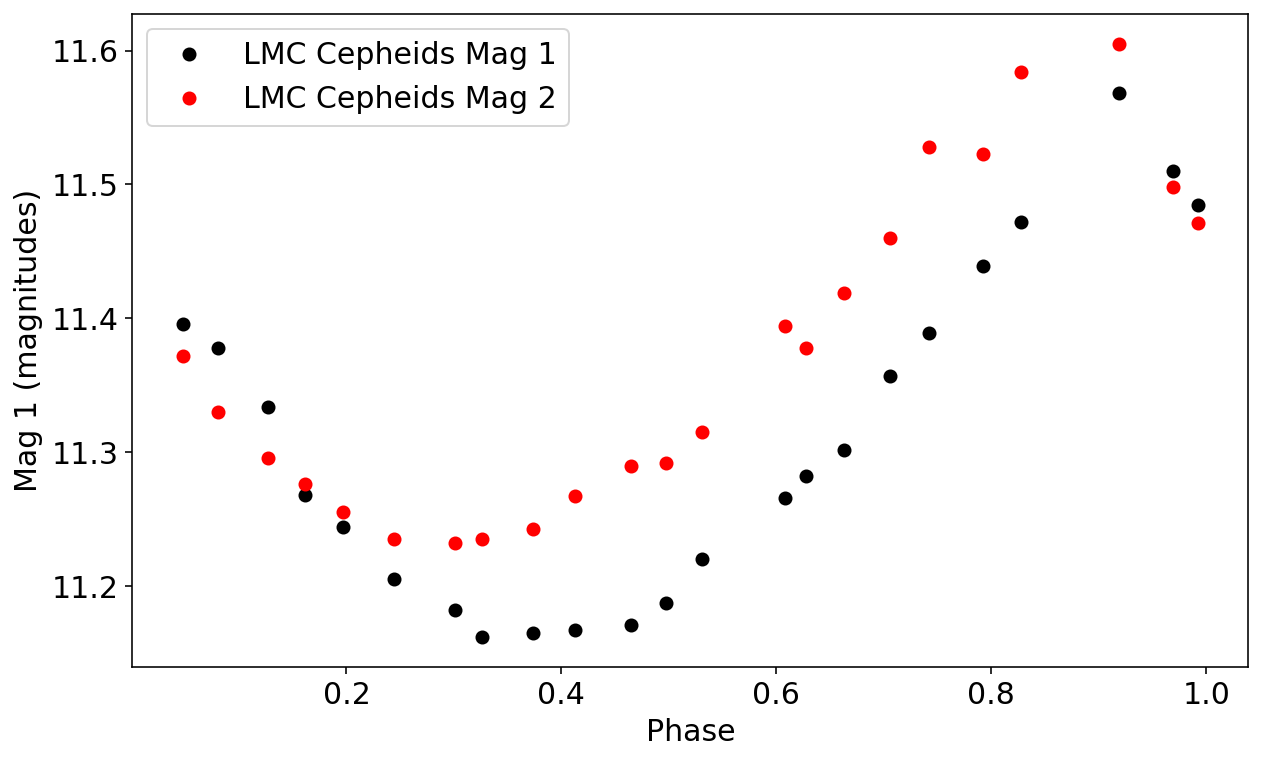

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(lmc2_df['phase'], lmc2_df['mag_1'], color='k', marker='o', linestyle='None', label='LMC Cepheids Mag 1')
ax.plot(lmc2_df['phase'], lmc2_df['mag_2'], color='r', marker='o', linestyle='None', label='LMC Cepheids Mag 2')
ax.set_xlabel('Phase')
ax.set_ylabel('Mag 1 (magnitudes)')
ax.legend()

In [13]:
def fitting_fun(phase, m_0, A, shift):
    return m_0 + A*np.sin(2*np.pi*phase + shift)

In [14]:
popt, pcov = curve_fit(fitting_fun, lmc2_df['phase'], lmc2_df['mag_1'])

m_01 = popt[0]

err_m_01 = np.sqrt(pcov[0][0])

popt2, pcov2 = curve_fit(fitting_fun, lmc2_df['phase'], lmc2_df['mag_2'])

m_02 = popt2[0]

err_m_02 = np.sqrt(pcov2[0][0])

print("m_01 = {0:.3f} +/- {1:.3f}".format(m_01, err_m_01))
print("m_02 = {0:.3f} +/- {1:.3f}".format(m_02, err_m_02))

m_01 = 11.317 +/- 0.006
m_02 = 11.376 +/- 0.007


## Combining datasets with pandas

In [15]:
optical_df = pd.read_csv('./data/optical_data.csv')
optical_df.head()

,Star_ID,logP,mag_B,err_B,mag_V,err_V,mag_I,err_I
0,RT Aur,0.571,6.120,0.017,5.487,0.011,4.822,0.006
1,QZ Nor,0.578,9.782,0.007,8.875,0.004,7.871,0.003
2,SU Cyg,0.585,7.493,0.015,6.890,0.011,6.208,0.007
3,Y Lac,0.636,9.921,0.016,9.163,0.011,8.312,0.007
4,T Vul,0.647,6.444,0.014,5.772,0.009,5.087,0.006


In [16]:
optical_df.shape
optical_df.describe()

,logP,mag_B,err_B,mag_V,err_V,mag_I,err_I
count,59.000000,58.000000,58.000000,59.000000,59.000000,57.000000,57.000000
mean,1.037034,8.600448,0.017224,7.462017,0.011186,6.251632,0.007211
std,0.298511,2.092962,0.004974,1.889636,0.003355,1.662180,0.002111
min,0.571000,4.586000,0.004000,3.749000,0.002000,2.564000,0.002000
25%,0.796500,7.450250,0.014250,6.264500,0.009000,5.204000,0.006000
50%,1.007000,8.662000,0.017000,7.504000,0.011000,6.301000,0.007000
75%,1.255500,9.915750,0.021000,8.887500,0.014000,7.486000,0.009000
max,1.653000,13.071000,0.027000,11.728000,0.018000,10.080000,0.011000


In [17]:
optical_df[optical_df.isna().any(axis=1)]

,Star_ID,logP,mag_B,err_B,mag_V,err_V,mag_I,err_I
10,delta Cep,0.730,4.684,0.018,3.990,0.012,NaN,NaN
32,V340 Nor,1.053,NaN,NaN,8.407,0.005,NaN,NaN


In [18]:
gaia_df = pd.read_csv('./data/gaia_distances.csv')
gaia_df.head()

,Star_ID,parallax_mas
0,XX Cen,0.564
1,T Mon,0.733
2,TW Nor,0.362
3,CV Mon,0.602
4,RY Sco,0.754


In [19]:
gaia_df.shape
gaia_df.describe()

,parallax_mas
count,67.000000
mean,0.968881
std,0.831380
min,0.211000
25%,0.399000
50%,0.602000
75%,1.242500
max,3.674000


In [20]:
reddenings_df = pd.read_csv('./data/reddenings.csv')
reddenings_df.head()

,Star_ID,E_B_V,A_V
0,RT Aur,0.1844,0.5717
1,QZ Nor,1.2364,3.8329
2,SU Cyg,0.9989,3.0967
3,Y Lac,0.3880,1.2028
4,T Vul,0.1702,0.5278


In [21]:
reddenings_df.shape
reddenings_df.describe()

,E_B_V,A_V
count,54.000000,54.000000
mean,0.791817,2.454624
std,0.492727,1.527478
min,0.053900,0.166900
25%,0.334400,1.036800
50%,0.787700,2.441900
75%,1.175025,3.642675
max,1.909500,5.919500


In [22]:
cepheids_df = pd.merge(left=gaia_df, right=optical_df, on='Star_ID', how='outer')

In [23]:
cepheids_df

,Star_ID,parallax_mas,logP,mag_B,err_B,mag_V,err_V,mag_I,err_I
0,XX Cen,0.564,1.040,8.882,0.019,7.855,0.012,6.754,0.008
1,T Mon,0.733,1.432,7.436,0.022,6.187,0.014,5.005,0.010
2,TW Nor,0.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CV Mon,0.602,0.731,11.681,0.015,10.314,0.010,8.653,0.006
4,RY Sco,0.754,1.308,9.568,0.018,8.037,0.012,6.271,0.008
...,...,...,...,...,...,...,...,...,...
62,delta Cep,3.556,0.730,4.684,0.018,3.990,0.012,NaN,NaN
63,U Aql,1.748,0.847,7.536,0.016,6.457,0.011,5.279,0.007
64,eta Aql,3.674,0.856,4.744,0.017,3.918,0.011,3.036,0.007
65,RT Aur,1.841,0.571,6.120,0.017,5.487,0.011,4.822,0.006


In [24]:
cepheids_df = pd.merge(left=cepheids_df, right=reddenings_df, on='Star_ID', how='outer')

In [25]:
cepheids_df

,Star_ID,parallax_mas,logP,mag_B,err_B,mag_V,err_V,mag_I,err_I,E_B_V,A_V
0,XX Cen,0.564,1.040,8.882,0.019,7.855,0.012,6.754,0.008,0.5223,1.6191
1,T Mon,0.733,1.432,7.436,0.022,6.187,0.014,5.005,0.010,0.5997,1.8590
2,TW Nor,0.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CV Mon,0.602,0.731,11.681,0.015,10.314,0.010,8.653,0.006,1.4373,4.4556
4,RY Sco,0.754,1.308,9.568,0.018,8.037,0.012,6.271,0.008,1.2228,3.7907
...,...,...,...,...,...,...,...,...,...,...,...
62,delta Cep,3.556,0.730,4.684,0.018,3.990,0.012,NaN,NaN,1.4914,4.6233
63,U Aql,1.748,0.847,7.536,0.016,6.457,0.011,5.279,0.007,0.3334,1.0337
64,eta Aql,3.674,0.856,4.744,0.017,3.918,0.011,3.036,0.007,0.1936,0.6001
65,RT Aur,1.841,0.571,6.120,0.017,5.487,0.011,4.822,0.006,0.1844,0.5717


In [26]:
cepheids_df.to_csv('./data/big_cepheids_table.csv', index=False, float_format='%.4f', na_rep='NaN')

## More fun with functions, dataframes and plotting

### Finding the distance

In [27]:
cepheids_df = pd.read_csv('./data/big_cepheids_table.csv')
cepheids_df

,Star_ID,parallax_mas,logP,mag_B,err_B,mag_V,err_V,mag_I,err_I,E_B_V,A_V
0,XX Cen,0.564,1.040,8.882,0.019,7.855,0.012,6.754,0.008,0.5223,1.6191
1,T Mon,0.733,1.432,7.436,0.022,6.187,0.014,5.005,0.010,0.5997,1.8590
2,TW Nor,0.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CV Mon,0.602,0.731,11.681,0.015,10.314,0.010,8.653,0.006,1.4373,4.4556
4,RY Sco,0.754,1.308,9.568,0.018,8.037,0.012,6.271,0.008,1.2228,3.7907
...,...,...,...,...,...,...,...,...,...,...,...
62,delta Cep,3.556,0.730,4.684,0.018,3.990,0.012,NaN,NaN,1.4914,4.6233
63,U Aql,1.748,0.847,7.536,0.016,6.457,0.011,5.279,0.007,0.3334,1.0337
64,eta Aql,3.674,0.856,4.744,0.017,3.918,0.011,3.036,0.007,0.1936,0.6001
65,RT Aur,1.841,0.571,6.120,0.017,5.487,0.011,4.822,0.006,0.1844,0.5717


In [28]:
def par_to_dis(w):
    return 1/(w*1e3)

In [29]:
cepheids_df['distance_pc'] = cepheids_df['parallax_mas']

### Correcting for reddening and extinction

In [30]:
def A_lam_fun(lam, A_V):
    return A_V*(0.7/lam-0.273)

In [31]:
cepheids_df['A_B'] = A_lam_fun(0.445, cepheids_df['A_V'])
cepheids_df['A_I'] = A_lam_fun(0.806, cepheids_df['A_V'])

In [32]:
cepheids_df['A_I']

0     0.964152
1     1.107009
2          NaN
3     2.653249
4     2.257310
        ...   
62    2.753112
63    0.615554
64    0.357351
65    0.340440
66         NaN
Name: A_I, Length: 67, dtype: float64

### Find the absolute magnitude

In [33]:
def dist_mod(distance):
    mu = 5.*np.log10(distance) - 5.
    return(mu)

def abs_mag(app_mag, extinction, mu):
    absolute_mag = app_mag - extinction - mu
    return(absolute_mag)

cepheids_df['V_abs'] = cepheids_df.apply(lambda x: abs_mag(x.mag_V, x.A_V, dist_mod(x.distance_pc)), axis=1)

In [34]:
cepheids_df['B_abs'] = cepheids_df.apply(lambda x: abs_mag(x.mag_B, x.A_B, dist_mod(x.distance_pc)), axis=1)
cepheids_df['I_abs'] = cepheids_df.apply(lambda x: abs_mag(x.mag_I, x.A_I, dist_mod(x.distance_pc)), axis=1)

In [35]:
cepheids_df.columns

Index(['Star_ID', 'parallax_mas', 'logP', 'mag_B', 'err_B', 'mag_V', 'err_V',
       'mag_I', 'err_I', 'E_B_V', 'A_V', 'distance_pc', 'A_B', 'A_I', 'V_abs',
       'B_abs', 'I_abs'],
      dtype='object')

### Fancy plotting

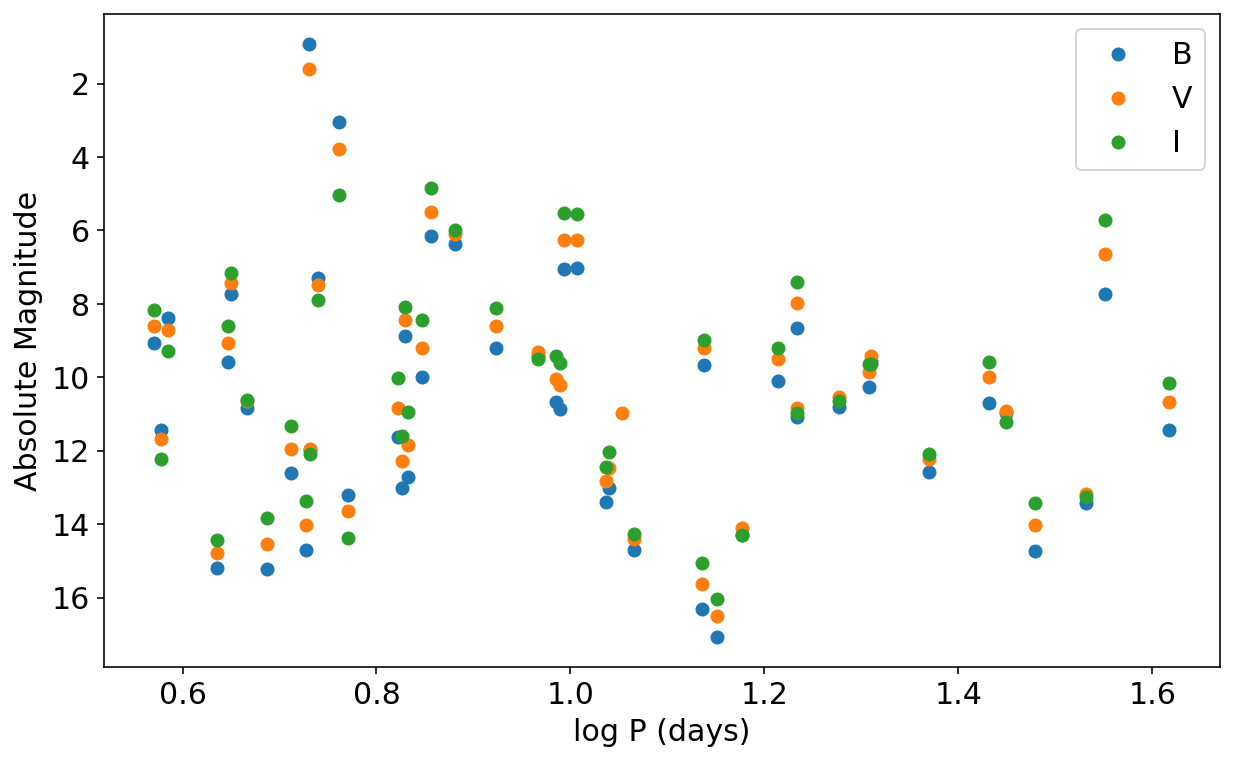

In [36]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cepheids_df['logP'], cepheids_df['B_abs'], 'o', label='B')
ax.plot(cepheids_df['logP'], cepheids_df['V_abs'], 'o', label='V')
ax.plot(cepheids_df['logP'], cepheids_df['I_abs'], 'o', label='I')
ax.set_xlabel('log P (days)')
ax.set_ylabel('Absolute Magnitude')
ax.invert_yaxis()
ax.legend()
plt.show()

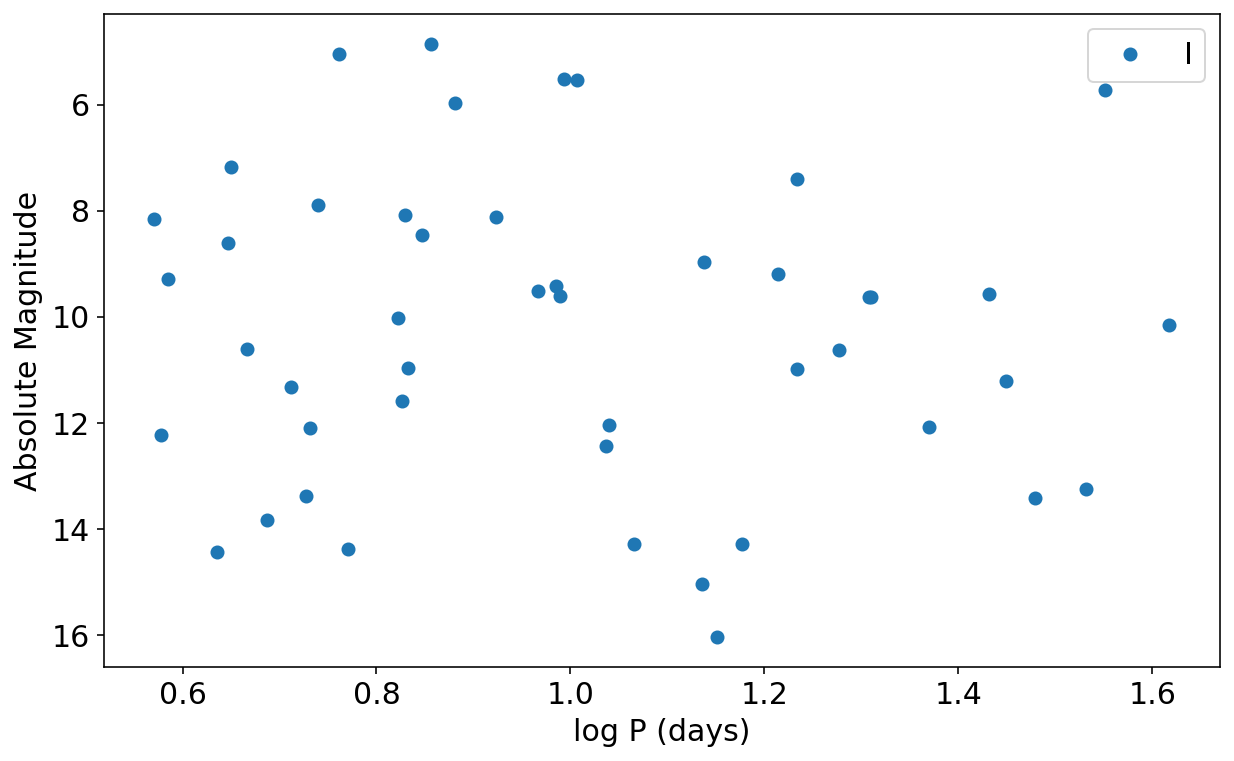

In [37]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cepheids_df['logP'], cepheids_df['I_abs'], 'o', label='I')
ax.set_xlabel('log P (days)')
ax.set_ylabel('Absolute Magnitude')
ax.invert_yaxis()
ax.legend()
plt.show()

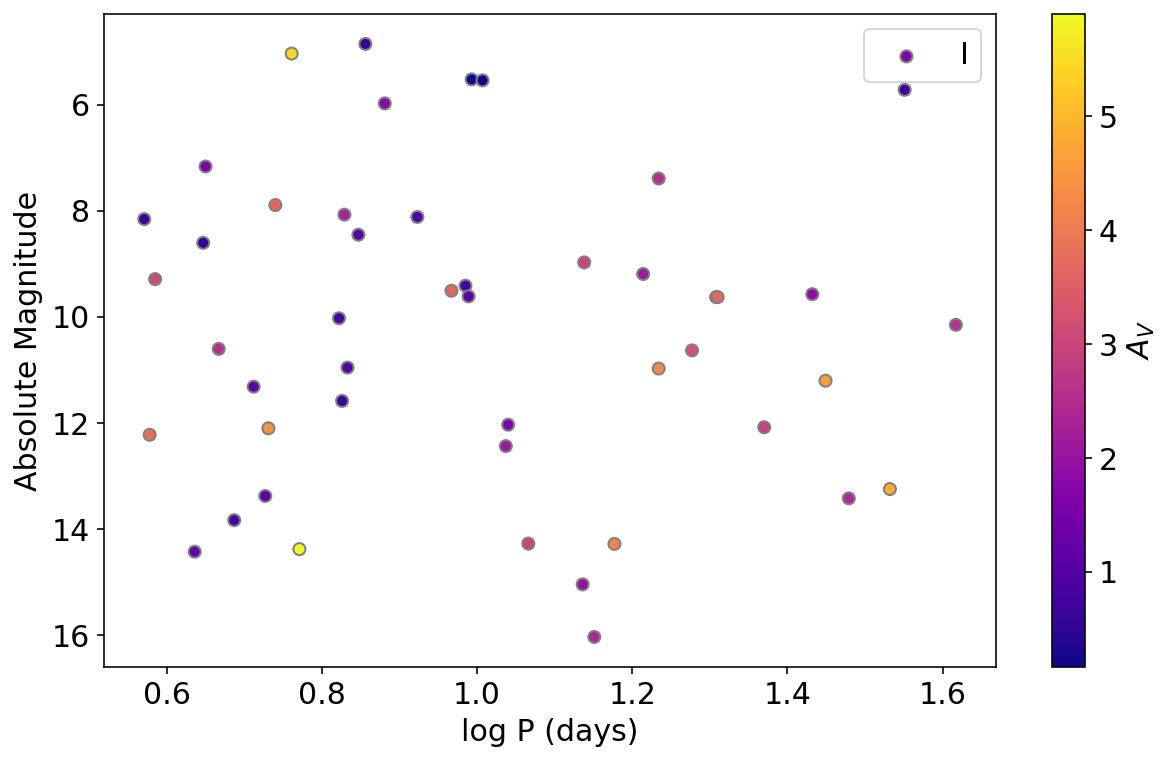

In [38]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('plasma')
sc = ax.scatter(cepheids_df['logP'], cepheids_df['I_abs'], c=cepheids_df['A_V'], marker='o', label='I', cmap=cm, edgecolor='Grey')

ax.set_xlabel('log P (days)')
ax.set_ylabel('Absolute Magnitude')
ax.invert_yaxis()
ax.legend()

cbar = plt.colorbar(sc)
cbar.set_label('$A_V$')
plt.show()

In [39]:
cepheids_df.to_csv('./data/big_cepheids_file_with_extinctions_and_distances_and_whathaveyou.csv', index=False, float_format='%.4f', na_rep='NaN')